In [38]:
import numpy as np


def read_matrix_from_file(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
        matrix = [[int(x) for x in line.split()] for line in lines[1:]]
    return np.array(matrix)


matrix_1 = read_matrix_from_file("matrix_1.txt")
matrix_2 = read_matrix_from_file("matrix_2.txt")
result_matrix = read_matrix_from_file("result_matrix.txt")

result_matrix_python = np.dot(matrix_1, matrix_2)

if np.array_equal(result_matrix_python, result_matrix):
    print("Результаты совпадают")
else:
    print("Результаты не совпадают")

Результаты совпадают


In [36]:
import matplotlib.pyplot as plt
import scipy.stats as sts
import statistics as st
import pandas as pd


def read_results(filename):
    sizes = []
    computation_times = []
    with open(filename, 'r') as file:
        while True:
            tmp = []
            size_line = file.readline().strip()
            if not size_line:
                break
            size = int(size_line)
            task_size = int(file.readline().strip())
            for i in range(0, 10):
                comp_time = file.readline().strip()
                if not comp_time:
                    break
                tmp.append(int(comp_time))

            sizes.append(size)
            computation_times.append(tmp)
    return sizes, computation_times


def plot_intervals(sizes, intervals):
    means = [interval[0] for interval in intervals]
    lower_bounds = [interval[1][0] for interval in intervals]
    upper_bounds = [interval[1][1] for interval in intervals]

    plt.errorbar(sizes, means, yerr=[(upper-lower)/2 for upper, lower in zip(upper_bounds, lower_bounds)], fmt='o-', capsize=5)
    plt.xlabel('Размер матрицы')
    plt.ylabel('Время умножения')
    plt.grid(True)
    plt.show()


def get_intervals(computation_times):
    gamma = 0.95
    intervals = []
    for time in computation_times:
        n = len(time)
        x_mean = np.mean(time)
        s = np.sqrt(st.variance(time))
        confidence_interval = sts.t.interval(gamma, df=n-1, loc=x_mean, scale=s/np.sqrt(n))
        intervals.append([x_mean, confidence_interval])
    return intervals


sizes, computation_times = read_results("stats.txt")
arr = pd.DataFrame({"sizes":sizes, "times":computation_times})
intervals = get_intervals(computation_times)

In [31]:
arr

,sizes,times
0,100,"[9, 9, 8, 11, 11, 8, 8, 8, 8, 9]"
1,200,"[46, 43, 45, 48, 44, 62, 53, 43, 38, 39]"
2,300,"[107, 132, 131, 108, 104, 106, 108, 119, 103, ..."
3,400,"[241, 224, 231, 247, 218, 231, 262, 226, 216, ..."
4,500,"[402, 448, 423, 462, 502, 431, 434, 544, 485, ..."
5,600,"[759, 856, 926, 701, 720, 720, 697, 754, 729, ..."
6,700,"[1141, 1138, 1122, 1179, 1098, 1093, 1080, 109..."
7,800,"[1968, 1949, 2030, 1826, 1991, 1952, 1958, 187..."
8,900,"[2576, 2649, 2865, 2770, 2836, 2354, 2582, 240..."
9,1000,"[4273, 4148, 4301, 4472, 4377, 4412, 4823, 425..."


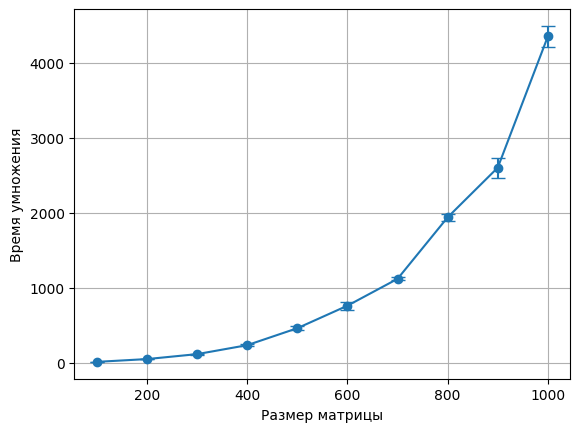

In [37]:
plot_intervals(sizes, intervals)